In [1]:
!pip install graphlearning
!pip install pot
!pip install pyvis
from ot_class import *


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


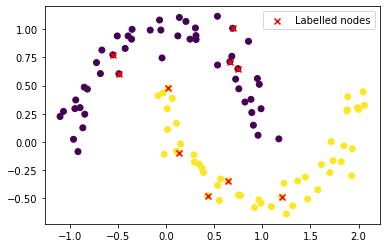

In [2]:
n = 100 # Number of samples
k = 2
lab_n = 5 # Number of labels per class

# Generate data sets
X, labels = datasets.make_moons(n_samples = n, noise = 0.1, random_state=0) # Generate point clouds and labels
train_ind = gl.trainsets.generate(labels, rate = lab_n, seed = 0) # Generate indices of "labeled" nodes
train_labels = labels[train_ind]
W = gl.weightmatrix.knn(X,10).toarray()

mu = np.zeros((n,k))
mu[train_ind] = euclidean_basis(train_labels , k)- train_labels.sum(axis = 0)/train_ind.size

plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.scatter(X[train_ind, 0], X[train_ind, 1], color = 'red', marker = 'x', label = "Labelled nodes")

plt.legend()
plt.show()


In [3]:
u = wass_dist(W, mu, np.zeros((n,k)), np.zeros((n,n,k)), threshold = 1e-2)
predictions = predict(u)

model = gl.ssl.poisson(W, solver='gradient_descent')
poisson_u = model.fit(train_ind, labels[train_ind])

#save_models(u, "wass1_data.pickle")
print(norm(u - poisson_u)) #The two solutions are not the same

141.25254692336668


## Comparison between potential and Poisson learning
When calculating the Kantorovich potential, we initialize u = 0

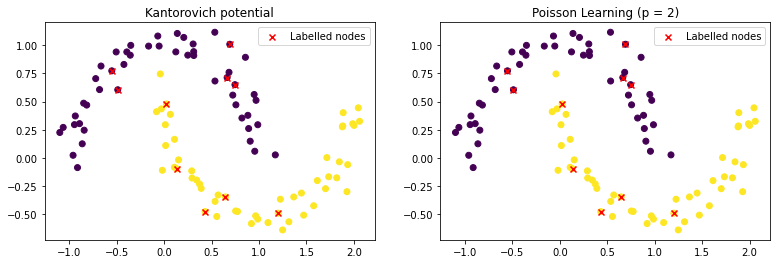

In [7]:
fig, ax = plt.subplots(ncols = 2, figsize = (13,4))

ax[0].scatter(X[:, 0], X[:, 1], c = predict(u))
ax[0].set_title('Kantorovich potential')
ax[0].scatter(X[train_ind, 0], X[train_ind, 1], color = 'red', marker = 'x', label = "Labelled nodes")
ax[0].legend()

ax[1].scatter(X[:, 0], X[:, 1], c = model.predict())
ax[1].scatter(X[train_ind, 0], X[train_ind, 1], color = 'red', marker = 'x', label = "Labelled nodes")
ax[1].legend()
ax[1].set_title('Poisson Learning (p = 2)')

plt.show()

## Comparison between potential and Poisson learning
When calculating the Kantorovich potential, we initialize u = limit of p-Poisson learning as $ p \to \infty$

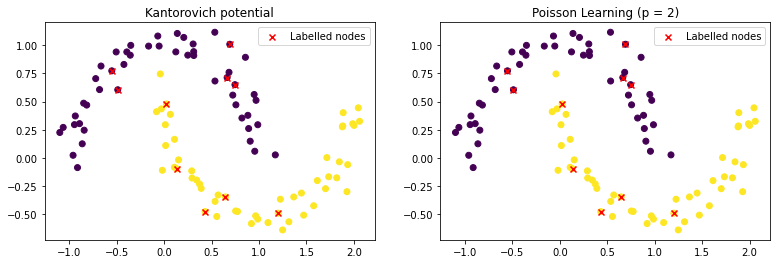

In [10]:
models = load_models("twomoons_data")
u = wass_dist(W, mu, models[255].u, np.zeros((n,n,k)), threshold = 1e-2)
predictions = predict(u)

fig, ax = plt.subplots(ncols = 2, figsize = (13,4))

ax[0].scatter(X[:, 0], X[:, 1], c = predict(u))
ax[0].set_title('Kantorovich potential')
ax[0].scatter(X[train_ind, 0], X[train_ind, 1], color = 'red', marker = 'x', label = "Labelled nodes")
ax[0].legend()

ax[1].scatter(X[:, 0], X[:, 1], c = model.predict())
ax[1].scatter(X[train_ind, 0], X[train_ind, 1], color = 'red', marker = 'x', label = "Labelled nodes")
ax[1].legend()
ax[1].set_title('Poisson Learning (p = 2)')

plt.show()

In [ ]:
dd